In [2]:
import pandas as pd
import csv
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from scipy.stats import linregress

In [3]:
kindle_csv = "C:/Users/freak/Downloads/kindle_reviews.csv"
kindle_data = pd.read_csv(kindle_csv)
kindle_data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


In [4]:
# Does any relationship lie between ratings and total ratings?

kindle_group = kindle_data.groupby("overall")
kindle_size = kindle_group.size()

In [30]:
kindle_group = kindle_data.groupby("asin")
kindle_size = kindle_group.size()
kindle_avg = kindle_group.mean()
# kindle_df = pd.DataFrame({"Review Count": kindle_size, "Review Average": kindle_avg})
kindle_df = pd.DataFrame(kindle_avg)
kindle_df["Review Count"] = kindle_size
kindle_df = kindle_df.rename(columns = {"overall": "Review Average"})
kindle_df = kindle_df[["Review Count", "Review Average"]]
kindle_df = kindle_df.loc[kindle_df["Review Count"] < 600]
kindle_df

,Review Count,Review Average
asin,,
B000F83SZQ,8,4.250000
B000FA64PA,5,4.200000
B000FA64PK,8,4.375000
B000FA64QO,5,3.800000
B000FBFMVG,9,4.333333
...,...,...
B00LZFHL7Y,16,4.750000
B00LZKMXBI,75,4.813333
B00M029T4O,11,4.909091


In [1]:
# review_group = kindle_df.groupby("Review Count")
# review_med = (review_group.max() - review_group.min)/2 + review_group.min
# review_med

Text(0.5, 1.0, 'Number by Average of Reviews per Book')

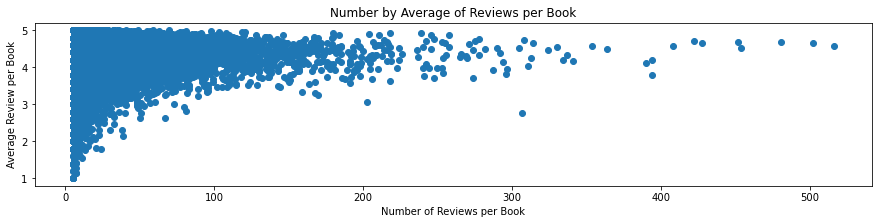

In [43]:
plt.figure(figsize=(15, 3))
plt.scatter(kindle_df["Review Count"], kindle_df["Review Average"])
# (slope, intercept, rvalue, pvalue, stderr) = linregress(kindle_df["Review Count"], kindle_df["Review Average"])
# regress_values = kindle_df["Review Count"] * slope + intercept
# line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
# plt.plot(kindle_df["Review Count"],regress_values,"r-")
# print(line_eq)
# print(rvalue)

plt.xlabel("Number of Reviews per Book")
plt.ylabel("Average Review per Book")
plt.title("Number by Average of Reviews per Book")

In [29]:
kindle_df.loc[kindle_df["Review Count"] > 600]

,Review Count,Review Average
asin,,
B006GWO5WK,1113,4.536388
B00BTIDW4S,781,4.434059


In [4]:
kindle_data.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

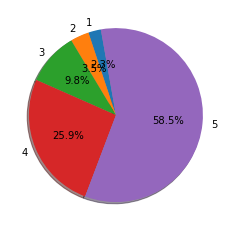

In [5]:
plt.pie(kindle_size, labels = kindle_size.index, autopct = "%1.1f%%", shadow=True,startangle = 100)
plt.show()

In [6]:
title_kindle = kindle_data.groupby("asin")
title_kindle.mean()

,Unnamed: 0,overall,unixReviewTime
asin,,,
B000F83SZQ,3.5,4.250000,1.396451e+09
B000FA64PA,10.0,4.200000,1.354890e+09
B000FA64PK,16.5,4.375000,1.354190e+09
B000FA64QO,23.0,3.800000,1.352782e+09
B000FBFMVG,30.0,4.333333,1.341034e+09
...,...,...,...
B00LZFHL7Y,982488.5,4.750000,1.405949e+09
B00LZKMXBI,982534.0,4.813333,1.405924e+09
B00M029T4O,982577.0,4.909091,1.405940e+09


In [7]:
books_csv = "C:/Users/freak/Downloads/books_data.csv"
books_data = pd.read_csv(books_csv)
books_data

,user,product,review,timestamp
0,A2IIIDRK3PRRZY,0000000116,1.0,1395619200
1,A1TADCM7YWPQ8M,0000000868,4.0,1031702400
2,AWGH7V0BDOJKB,0000013714,4.0,1383177600
3,A3UTQPQPM4TQO0,0000013714,5.0,1374883200
4,A8ZS0I5L5V31B,0000013714,5.0,1393632000
...,...,...,...,...
22507150,A1BQO66R6OLCCW,B00M13FNSS,5.0,1406073600
22507151,A1CI87FHKK6HVC,B00M13FNSS,5.0,1406073600
22507152,A8W4BR3HGGS3C,B00M13FNSS,5.0,1406073600
22507153,A2NRGE3CSFY2TQ,B00M13FNSS,5.0,1406073600


In [8]:
books_data.loc[22507154, "review"] = 4
book_group = books_data.groupby("review")
book_size = book_group.size()

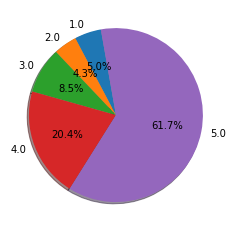

In [9]:
plt.pie(book_size, labels = book_size.index, autopct = "%1.1f%%", shadow=True,startangle = 100)
plt.show()

In [10]:
title_book = books_data.groupby("product")
title_book.mean()

,review,timestamp
product,,
0000000116,2.500000,1.207742e+09
0000000868,4.000000,1.031702e+09
0000013714,4.285714,1.353326e+09
0000015393,4.000000,1.239494e+09
0000029831,4.800000,1.393235e+09
...,...,...
B00M0CZP1A,4.000000,1.406056e+09
B00M0RE7CS,4.969697,1.406016e+09
B00M111QCM,5.000000,1.406074e+09


In [18]:
kindle_1 = kindle_data.loc[kindle_data["overall"] == 1, :]
kindle_1

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
64,64,B000FDJ0FS,"[2, 9]",1,He had an english accent which he seemed tryin...,"12 10, 2013",A39N0BN4B2Q7F,"Amazoner ""reader, thinker, doer""",In was thinking of getting until I heard the c...,1386633600
65,65,B000FDJ0FS,"[2, 2]",1,Somewhat of a disappointment. The articles we...,"12 13, 2012",A2XGPSOJXTW5JF,Anne,Wall Street Journal,1355356800
66,66,B000FDJ0FS,"[1, 1]",1,1. Costs more than delivered to your door pape...,"08 19, 2009",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Just Not Up To WSJ Standards,1250640000
67,67,B000FDJ0FS,"[49, 57]",1,"The WSJ for Kindle is overpriced, and the cust...","02 26, 2008",A3775OP5VTX5ON,"Coolkayaker ""ck1""",The WSJ Has Gone to Pot!,1203984000
71,71,B000FDJ0FS,"[3, 3]",1,I read nearly all my books and magazines on Ki...,"11 23, 2012",A3L25SHGZKH8Q1,John K. Pearson,Not quite a disaster,1353628800
...,...,...,...,...,...,...,...,...,...,...
981369,981369,B00LTFG8EC,"[3, 6]",1,If you're going to call it BOOK 1 then make it...,"07 17, 2014",A34BOMIVCKSZOA,DKell,BOOK 1???,1405555200
981521,981521,B00LU32E1Y,"[3, 5]",1,I guess I keep expecting the magic from Bankro...,"07 16, 2014",A345FXEDB6FOBU,Amazon Customer,Huge Disappointment,1405468800
981605,981605,B00LU7JYC2,"[0, 0]",1,What a disappointment! It seemed a copy of bo...,"07 22, 2014",A1IWBKRIGHV1K1,MA EUGENIA NORIEGA C,What a disappointment!,1405987200
982299,982299,B00LYPIQRY,"[0, 1]",1,Let me start this review by saying I loved lov...,"07 21, 2014",A33NPY4WRP7ZR0,Irish_caia,I wanted to love it...,1405900800


In [99]:
kindle_1["reviewText"]

64        He had an english accent which he seemed tryin...
65        Somewhat of a disappointment.  The articles we...
66        1. Costs more than delivered to your door pape...
67        The WSJ for Kindle is overpriced, and the cust...
71        I read nearly all my books and magazines on Ki...
                                ...                        
981369    If you're going to call it BOOK 1 then make it...
981521    I guess I keep expecting the magic from Bankro...
981605    What a disappointment!  It seemed a copy of bo...
982299    Let me start this review by saying I loved lov...
982410    I couldn't connect with the leading characters...
Name: reviewText, Length: 23018, dtype: object

In [141]:
word_list = []
for review in kindle_1["reviewText"]:
    review_replace = review.replace(".", " ")
    review_replace = review_replace.replace("&#34;", " ")
    review_replace = review_replace.replace("*", " ")
    review_replace = review_replace.replace("(", " ")
    review_replace = review_replace.replace(")", " ")
    review_replace = review_replace.replace(",", " ")
    review_replace = review_replace.replace('''"''', " ")
    review_replace = review_replace.replace("?", " ")
    review_replace = review_replace.replace("!", " ")
    review_replace = review_replace.replace("/", " ")
    review_replace = review_replace.replace(":", " ")

    word_split = review_replace.split(" ")
    for word in word_split:
        word = word.lower()
        word_list.append(word)

len(word_list)

2465201

In [142]:
word_df = pd.DataFrame(word_list)

word_df[0].value_counts()

               310623
the            100989
i               65956
to              57479
and             56322
                ...  
mjd's               1
rueful              1
'ultra              1
curiosities         1
and2                1
Name: 0, Length: 47368, dtype: int64